In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 

In [2]:
text_df = pd.read_csv('stockpred.csv')
text_df.head()

,text_corpus,Date,Label
0,georgia two russian warplane country move brin...,2008-08-08,0
1,america nato help us help us help iraq bush pu...,2008-08-11,1
2,remember adorable year old sing opening ceremo...,2008-08-12,0
3,u refuse israel weapon attack iran report pres...,2008-08-13,0
4,expert admit legalise drug war south osetia pi...,2008-08-14,1


## Dividing data into training and testing set

In [3]:
text_df_train = text_df[text_df['Date'] <= '2014-12-31']
text_df_train.head()

,text_corpus,Date,Label
0,georgia two russian warplane country move brin...,2008-08-08,0
1,america nato help us help us help iraq bush pu...,2008-08-11,1
2,remember adorable year old sing opening ceremo...,2008-08-12,0
3,u refuse israel weapon attack iran report pres...,2008-08-13,0
4,expert admit legalise drug war south osetia pi...,2008-08-14,1


In [4]:
text_df_test = text_df[text_df['Date'] >= '2015-01-01']
text_df_test.head()

,text_corpus,Date,Label
1611,ost case cancer result sheer bad luck rather u...,2015-01-02,1
1612,oscow beijing high speed train reduce trip tim...,2015-01-05,0
1613,oil fall barrel oyota give away fuel cell pate...,2015-01-06,0
1614,shot fire french magazine hq bibi netanyahu ca...,2015-01-07,1
1615,ew charlie hebdo issue come next week hard suf...,2015-01-08,1


## Visualizing data of training set

In [5]:
text_df_up = text_df_train[text_df_train['Label'] == 1]
text_df_up.head()

,text_corpus,Date,Label
1,america nato help us help us help iraq bush pu...,2008-08-11,1
4,expert admit legalise drug war south osetia pi...,2008-08-14,1
5,mom miss gay man bad year old cheerleader woul...,2008-08-15,1
8,two elderly chinese woman sentence year educat...,2008-08-20,1
9,british resident hold guantanamo bay win legal...,2008-08-21,1


In [6]:
text_df_down = text_df_train[text_df_train['Label'] == 0]
text_df_down.head()

,text_corpus,Date,Label
0,georgia two russian warplane country move brin...,2008-08-08,0
2,remember adorable year old sing opening ceremo...,2008-08-12,0
3,u refuse israel weapon attack iran report pres...,2008-08-13,0
6,afghan prison majority female prisoner serve y...,2008-08-18,0
7,man arrest lock five hour take photo police va...,2008-08-19,0


In [11]:
# Classes for up and down are almost balanced with 54% and 46% data
ratio = len(text_df_up)/len(text_df_train)
ratio

0.5418994413407822

In [20]:
text_up = " ".join(headline for headline in text_df_up.text_corpus)
text_up

'america nato help us help us help iraq bush put foot georgian conflict jewish georgian minister thank israeli training fend russia georgian army flee disarray russians advance gori abandon russia without shot fired olympic opening ceremony firework faked mossad fraudulent new zealand passport iraq russia anger israeli military sale georgia american citizen live ossetia blame u georgian leader genocide innocent people welcome world war iv high definition georgia move mistake monumental proportion russia press deeply georgia u say regime change goal abhinav bindra win first ever individual olympic gold medal india u ship head arctic define territory driver jerusalem taxi station threaten quit rather work new boss arab french team stun phelps x relay team israel us behind georgian aggression believe tv neither russian georgian much victims riot still go montreal canada police murder boy saturday china overtake us large manufacturer war south ossetia [ pics ] israeli physicians group cond

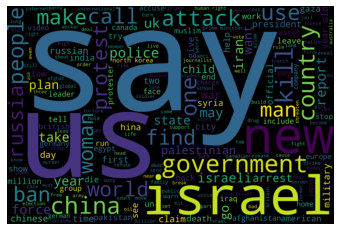

In [21]:
# Generate a word cloud for times when stock is up
wordcloud_up = WordCloud(background_color="black",width=4500,height=3000).generate(text_up)
plt.imshow(wordcloud_up, interpolation='bilinear')
plt.axis("off")
plt.show()

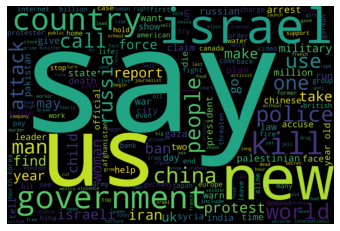

In [19]:
text_down = " ".join(headline for headline in text_df_down.text_corpus)
# Generate a word cloud for times when stock is down
wordcloud_down = WordCloud(background_color="black",width=4500,height=3000).generate(text_down)
plt.imshow(wordcloud_down, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Creating barplots for checking most common unigrams and bigrams for getting basic idea of data

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

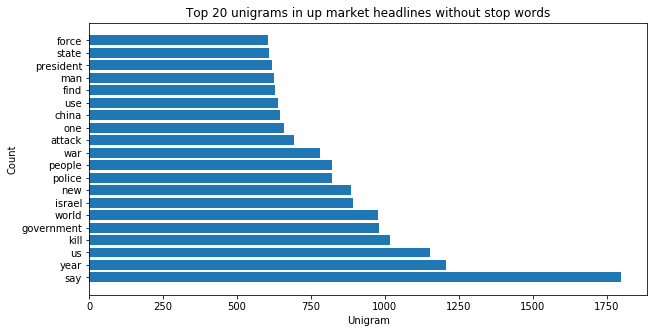

In [43]:
common_words = get_top_n_words(text_df_up.text_corpus, 20)

top_df_up = pd.DataFrame(common_words, columns = ['Word' , 'count'])
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(top_df_up['Word'], top_df_up['count']) 
  
plt.xlabel("Unigram") 
plt.ylabel("Count") 
plt.title("Top 20 unigrams in up market headlines without stop words") 
plt.show() 

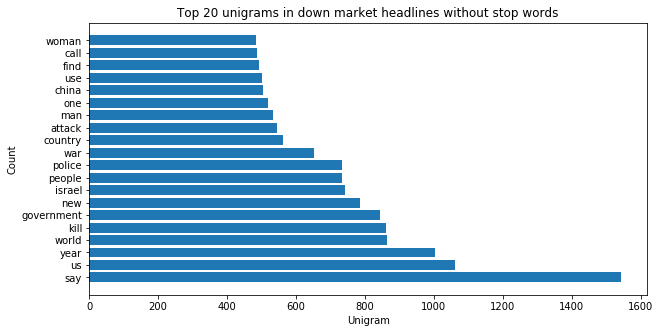

In [44]:
common_words = get_top_n_words(text_df_down.text_corpus, 20)

top_df_down = pd.DataFrame(common_words, columns = ['Word' , 'count'])
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(top_df_down['Word'], top_df_down['count']) 
  
plt.xlabel("Unigram") 
plt.ylabel("Count") 
plt.title("Top 20 unigrams in down market headlines without stop words") 
plt.show() 

In [45]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

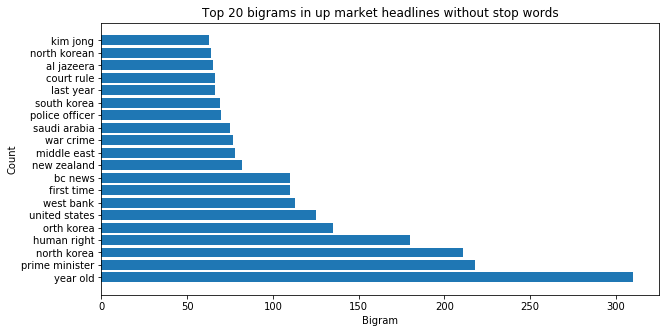

In [46]:
common_bigrams = get_top_n_bigrams(text_df_up.text_corpus, 20)

top_df_bigrams_up = pd.DataFrame(common_bigrams, columns = ['Word' , 'count'])
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(top_df_bigrams_up['Word'], top_df_bigrams_up['count']) 
  
plt.xlabel("Bigram") 
plt.ylabel("Count") 
plt.title("Top 20 bigrams in up market headlines without stop words") 
plt.show() 

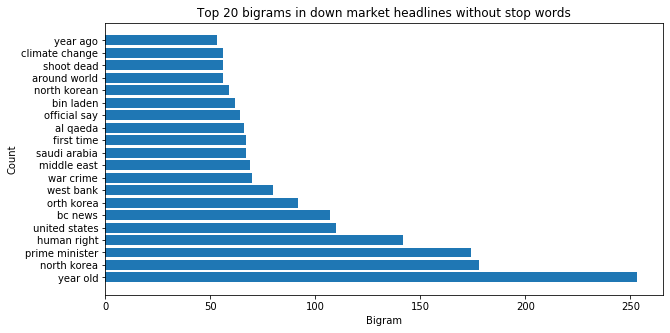

In [47]:
common_bigrams = get_top_n_bigrams(text_df_down.text_corpus, 20)

top_df_bigrams_down = pd.DataFrame(common_bigrams, columns = ['Word' , 'count'])
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(top_df_bigrams_down['Word'], top_df_bigrams_down['count']) 
  
plt.xlabel("Bigram") 
plt.ylabel("Count") 
plt.title("Top 20 bigrams in down market headlines without stop words") 
plt.show() 

#### Checking using TF-IDF

In [49]:
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

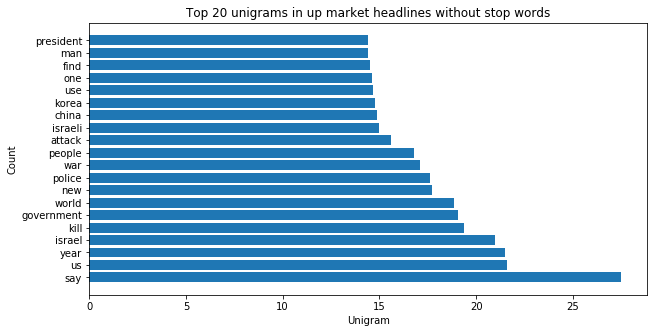

In [50]:
common_words = get_top_n_words(text_df_up.text_corpus, 20)

top_df_up = pd.DataFrame(common_words, columns = ['Word' , 'count'])
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(top_df_up['Word'], top_df_up['count']) 
  
plt.xlabel("Unigram") 
plt.ylabel("Count") 
plt.title("Top 20 unigrams in up market headlines without stop words") 
plt.show() 

#### Performing Named Entity Recognition to find most important countries and organizations

In [85]:
def ner(column):
    named_entities = []
    for sentence in column:
        temp_entity_name = ''
        temp_named_entity = None
        sentence = nlp(sentence)
        for word in sentence:
            term = word.text 
            tag = word.ent_type_
            if tag:
                temp_entity_name = ' '.join([temp_entity_name, term]).strip()
                temp_named_entity = (temp_entity_name, tag)
            else:
                if temp_named_entity:
                    named_entities.append(temp_named_entity)
                    temp_entity_name = ''
                    temp_named_entity = None

    entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
    return entity_frame

In [57]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Entity Name,israel,israeli,china,us,one,russia,iran,uk,russian,chinese,gaza,first,british,two,palestinian,un,iraq,india,pakistan,german
Entity Type,GPE,NORP,GPE,GPE,CARDINAL,GPE,GPE,GPE,NORP,NORP,GPE,ORDINAL,NORP,CARDINAL,NORP,ORG,GPE,GPE,GPE,NORP
Frequency,1154,796,728,676,620,592,578,553,550,514,501,496,431,421,402,396,351,340,325,303


In [58]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.iloc[:,:20]

,Entity Type,Frequency
0,GPE,17001
1,NORP,14243
2,ORG,9562
3,PERSON,8313
4,DATE,3860
5,CARDINAL,3252
6,LOC,1353
7,ORDINAL,868
8,FAC,662
9,EVENT,409


In [77]:
def plot_top_countries(ner_df):
    top_countries = (ner_df[ner_df['Entity Type'] == 'GPE'].groupby(by=['Entity Name'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
    cont = top_countries[:10]
    fig = plt.figure(figsize = (10, 5)) 
  
    # creating the bar plot 
    plt.barh(cont['Entity Name'], cont['Frequency']) 
    plt.xlabel("Country") 
    plt.ylabel("Count") 
    plt.title("Top 10 countries in news headlines") 
    plt.show() 

In [78]:
def plot_top_organizations(ner_df):
    top_organizations = (ner_df[ner_df['Entity Type'] == 'ORG'].groupby(by=['Entity Name'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
    org = top_organizations[:10]
    fig = plt.figure(figsize = (10, 5)) 
  
    # creating the bar plot 
    plt.barh(org['Entity Name'], org['Frequency']) 
    plt.xlabel("Organization") 
    plt.ylabel("Count") 
    plt.title("Top 10 organizations in news headlines") 
    plt.show() 

In [79]:
def plot_top_person(ner_df):
    top_person = (ner_df[ner_df['Entity Type'] == 'PERSON'].groupby(by=['Entity Name'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
    person = top_person[:10]
    fig = plt.figure(figsize = (10, 5)) 
  
    # creating the bar plot 
    plt.barh(person['Entity Name'], person['Frequency']) 
    plt.xlabel("Person") 
    plt.ylabel("Count") 
    plt.title("Top 10 person in news headlines") 
    plt.show() 

#### Plotting for whole training dataset

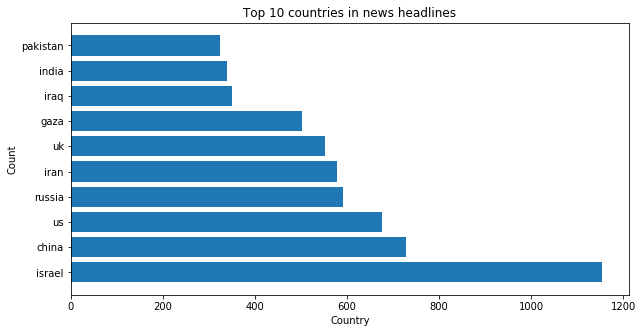

In [86]:
ner_full_df = ner(text_df_train.text_corpus)
plot_top_countries(ner_full_df)

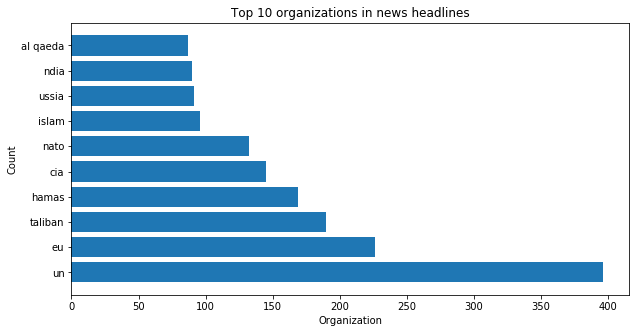

In [87]:
plot_top_organizations(ner_full_df)

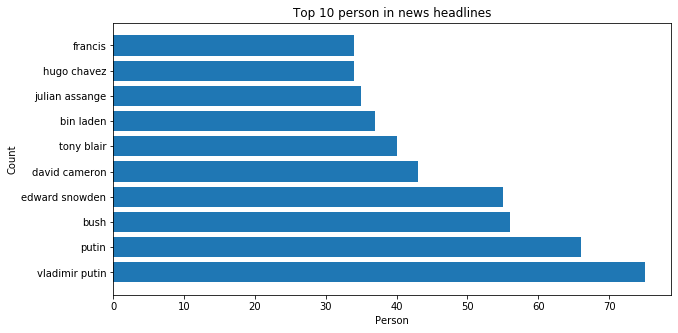

In [88]:
plot_top_person(ner_full_df)

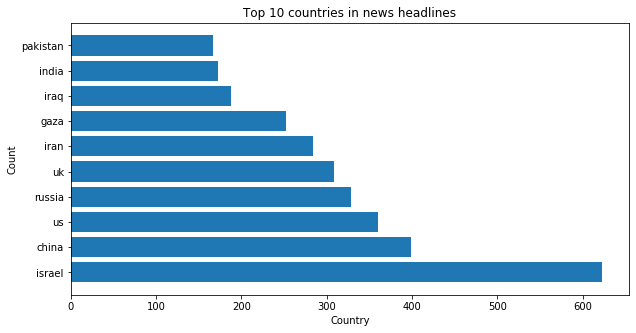

In [89]:
ner_up_df = ner(text_df_up.text_corpus)
plot_top_countries(ner_up_df)

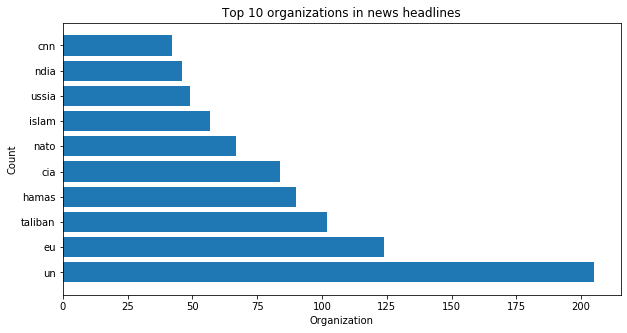

In [90]:
plot_top_organizations(ner_up_df)

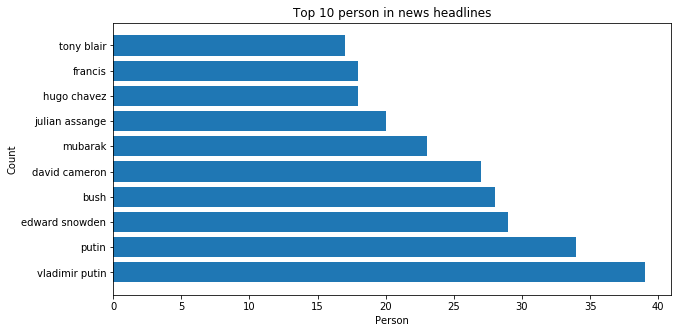

In [91]:
plot_top_person(ner_up_df)

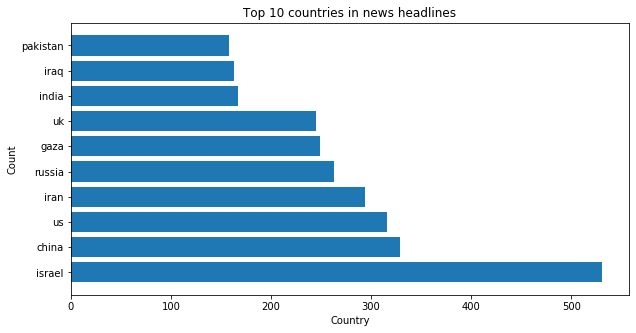

In [92]:
ner_down_df = ner(text_df_down.text_corpus)
plot_top_countries(ner_down_df)

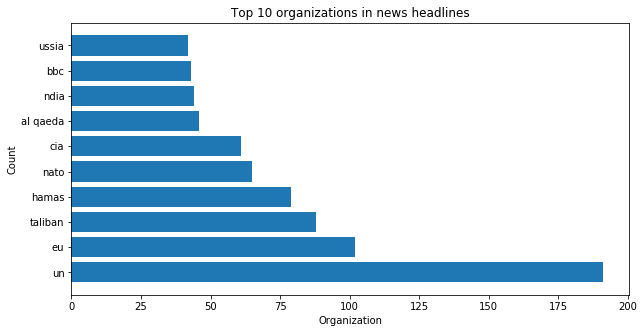

In [93]:
plot_top_organizations(ner_down_df)

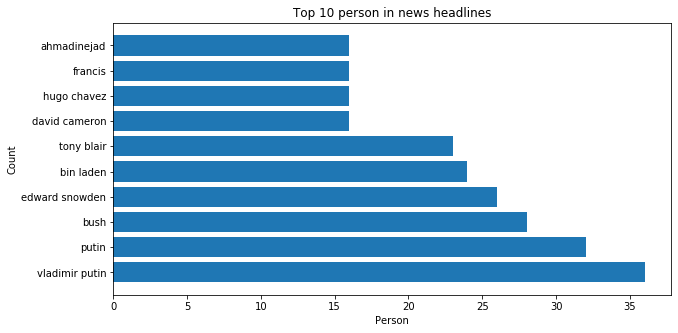

In [94]:
plot_top_person(ner_down_df)

## Performing Topic Modelling 

In [101]:
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import gensim

In [102]:
def convert_to_token(column):
    texts = []
    for text in text_df_train.text_corpus:
        tokens = word_tokenize(text)
        texts.append(tokens)
    return texts

In [104]:
texts = convert_to_token(text_df_train.text_corpus)

In [105]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(txt) for txt in texts]

In [111]:
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary,passes=5,
                                     chunksize=10000)

In [112]:
import pyLDAvis.gensim

print(lda.print_topics(num_topics=10,num_words=10))

[(0, '0.006*"say" + 0.005*"us" + 0.004*"government" + 0.004*"year" + 0.004*"world" + 0.004*"israel" + 0.004*"war" + 0.004*"new" + 0.004*"people" + 0.003*"police"'), (1, '0.008*"say" + 0.005*"year" + 0.004*"world" + 0.004*"government" + 0.004*"police" + 0.004*"people" + 0.004*"kill" + 0.003*"israel" + 0.003*"war" + 0.003*"protest"'), (2, '0.007*"say" + 0.005*"year" + 0.004*"us" + 0.004*"new" + 0.004*"kill" + 0.004*"government" + 0.003*"world" + 0.003*"u" + 0.003*"people" + 0.003*"police"'), (3, '0.006*"say" + 0.005*"israel" + 0.005*"year" + 0.005*"kill" + 0.004*"us" + 0.004*"people" + 0.004*"israeli" + 0.004*"government" + 0.004*"war" + 0.003*"world"'), (4, '0.007*"say" + 0.005*"us" + 0.005*"world" + 0.004*"year" + 0.004*"kill" + 0.004*"police" + 0.004*"government" + 0.003*"new" + 0.003*"attack" + 0.003*"force"'), (5, '0.009*"say" + 0.004*"world" + 0.004*"police" + 0.004*"kill" + 0.004*"year" + 0.004*"us" + 0.003*"israeli" + 0.003*"russian" + 0.003*"israel" + 0.003*"people"'), (6, '0.00

In [113]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.019621  0.000143       1        1  35.099380
3     -0.028908 -0.005885       2        1  14.467938
0     -0.019632 -0.007014       3        1  13.111409
1     -0.020815 -0.000715       4        1  12.160412
4     -0.007897 -0.005306       5        1   6.463900
6     -0.014353 -0.002762       6        1   6.179218
7     -0.011445  0.012482       7        1   5.936194
5      0.016172  0.022031       8        1   3.036954
9      0.054075  0.039459       9        1   1.891827
8      0.052424 -0.052431      10        1   1.652767, topic_info=       Term         Freq        Total Category  logprob  loglift
133     say  3167.000000  3167.000000  Default  30.0000  30.0000
165      us  2072.000000  2072.000000  Default  29.0000  29.0000
176   world  1703.000000  1703.000000  Default  28.0000  28.0000
255  police  1450.000000  1450.000000  Default  27.0000  27.0000
178    year  2120.000000  2120.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
445    find    12.769404  1068.634399  Topic10  -6.4077  -0.3244
371   right    12.454491   951.882080  Topic10  -6.4327  -0.2336
29    china    12.466375  1095.321167  Topic10  -6.4317  -0.3730
28    child    12.126795   878.559753  Topic10  -6.4593  -0.1801
348    make    11.801579   947.979736  Topic10  -6.4865  -0.2834

[865 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.251521         [
0          2  0.245436         [
0          3  0.109533         [
0          4  0.137931         [
0          5  0.062880         [
...      ...       ...       ...
15244      8  0.007989      yria
15244      9  0.015977      yria
21507      9  0.466362  zabadani
28922      9  0.686057       zor
7521       8  0.640369     zumas

[2118 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5, 7, 8, 6, 10, 9])

In [118]:
texts_up = convert_to_token(text_df_up.text_corpus)
dictionary_up = corpora.Dictionary(texts_up)
corpus_up = [dictionary_up.doc2bow(txt) for txt in texts_up]
lda_up = gensim.models.ldamodel.LdaModel(corpus_up, num_topics=10, id2word=dictionary_up,passes=1,
                                     chunksize=10000)
print(lda_up.print_topics(num_topics=10,num_words=5))

[(0, '0.008*"say" + 0.005*"us" + 0.004*"world" + 0.004*"year" + 0.003*"israel"'), (1, '0.006*"us" + 0.004*"say" + 0.004*"year" + 0.004*"kill" + 0.004*"world"'), (2, '0.006*"say" + 0.006*"year" + 0.004*"new" + 0.004*"us" + 0.004*"kill"'), (3, '0.006*"year" + 0.006*"say" + 0.004*"kill" + 0.004*"police" + 0.004*"world"'), (4, '0.007*"say" + 0.007*"year" + 0.005*"us" + 0.004*"government" + 0.004*"war"'), (5, '0.008*"say" + 0.005*"us" + 0.004*"government" + 0.004*"u" + 0.003*"kill"'), (6, '0.007*"say" + 0.005*"new" + 0.005*"government" + 0.004*"us" + 0.004*"kill"'), (7, '0.006*"say" + 0.005*"year" + 0.005*"world" + 0.004*"us" + 0.004*"people"'), (8, '0.007*"say" + 0.006*"israel" + 0.005*"world" + 0.005*"government" + 0.004*"year"'), (9, '0.007*"say" + 0.004*"kill" + 0.004*"country" + 0.004*"police" + 0.004*"us"')]


In [119]:
pyLDAvis.gensim.prepare(lda_up, corpus_up, dictionary_up)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.004568 -0.001387       1        1  30.986124
7      0.000996 -0.002934       2        1  13.765791
5      0.003131  0.000132       3        1  10.916162
2      0.002602 -0.001626       4        1  10.395287
4      0.003939 -0.001260       5        1   9.978501
9     -0.000179 -0.004459       6        1   8.029104
0      0.001957  0.009338       7        1   6.446185
1      0.000339  0.001048       8        1   5.113951
8     -0.007133  0.003352       9        1   3.313675
3     -0.010221 -0.002203      10        1   1.055220, topic_info=       Term         Freq        Total Category  logprob  loglift
133     say  3222.000000  3222.000000  Default  30.0000  30.0000
178    year  1997.000000  1997.000000  Default  29.0000  29.0000
78   israel  1375.000000  1375.000000  Default  28.0000  28.0000
84     kill  1755.000000  1755.000000  Default  27.0000  27.0000
176   world  1670.000000  1670.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
618      uk     8.664297   825.722778  Topic10  -6.3468  -0.0056
387    take     9.093785   996.132507  Topic10  -6.2984  -0.1449
170     war     9.446159  1342.328491  Topic10  -6.2604  -0.4051
400   woman     8.813421   994.475891  Topic10  -6.3298  -0.1745
99      new     8.830325  1745.379517  Topic10  -6.3278  -0.7351

[872 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
9043      1  0.436273  \r\nmembership
182       5  0.625367         abhinav
1183      1  0.302824           abuse
1183      2  0.129362           abuse
1183      3  0.141122           abuse
...     ...       ...             ...
1281      6  0.074363           young
1281      7  0.050702           young
1281      8  0.040561           young
1281      9  0.023661           young
1281     10  0.010140           young

[2432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 6, 3, 5, 10, 1, 2, 9, 4])

In [116]:
texts_down = convert_to_token(text_df_down.text_corpus)
dictionary_down = corpora.Dictionary(texts_down)
corpus_down = [dictionary_down.doc2bow(txt) for txt in texts_down]
lda_down = gensim.models.ldamodel.LdaModel(corpus_down, num_topics=10, id2word=dictionary_down,passes=1,
                                     chunksize=10000)
print(lda_down.print_topics(num_topics=10,num_words=5))

[(0, '0.007*"year" + 0.006*"say" + 0.005*"kill" + 0.004*"world" + 0.004*"us"'), (1, '0.006*"say" + 0.004*"us" + 0.004*"police" + 0.004*"world" + 0.004*"new"'), (2, '0.008*"say" + 0.005*"kill" + 0.004*"us" + 0.004*"new" + 0.004*"world"'), (3, '0.007*"say" + 0.005*"us" + 0.004*"year" + 0.004*"new" + 0.004*"police"'), (4, '0.007*"say" + 0.007*"year" + 0.005*"us" + 0.004*"kill" + 0.004*"government"'), (5, '0.008*"say" + 0.004*"year" + 0.004*"new" + 0.004*"us" + 0.004*"world"'), (6, '0.006*"israel" + 0.005*"us" + 0.005*"say" + 0.004*"government" + 0.004*"kill"'), (7, '0.006*"say" + 0.005*"government" + 0.005*"us" + 0.004*"war" + 0.003*"new"'), (8, '0.007*"say" + 0.005*"us" + 0.004*"year" + 0.004*"people" + 0.004*"world"'), (9, '0.008*"say" + 0.005*"kill" + 0.004*"year" + 0.004*"government" + 0.004*"u"')]


In [117]:
pyLDAvis.gensim.prepare(lda_down, corpus_down, dictionary_down)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.003890  0.000408       1        1  18.823067
8      0.004157 -0.001592       2        1  15.967354
6      0.009175  0.001946       3        1  12.248683
7     -0.000261 -0.004812       4        1  11.951159
4     -0.002807 -0.001986       5        1  10.130036
5     -0.003042  0.004453       6        1   9.687765
0     -0.002912 -0.006014       7        1   5.813607
1     -0.002205  0.000227       8        1   5.682038
2     -0.002702  0.001955       9        1   5.462741
9     -0.003294  0.005415      10        1   4.233549, topic_info=           Term         Freq        Total Category  logprob  loglift
133         say  3108.000000  3108.000000  Default  30.0000  30.0000
84         kill  1700.000000  1700.000000  Default  29.0000  29.0000
178        year  2079.000000  2079.000000  Default  28.0000  28.0000
176       world  1687.000000  1687.000000  Default  27.0000  27.0000
660  government  1698.000000  1698.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
472   president    44.046207  1032.063843  Topic10  -6.1101   0.0081
255      police    54.187309  1484.211426  Topic10  -5.9029  -0.1481
165          us    65.024811  2137.672119  Topic10  -5.7206  -0.3306
35      country    43.407337  1076.578247  Topic10  -6.1247  -0.0488
395         use    42.549850  1103.014648  Topic10  -6.1447  -0.0930

[884 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
13513      1  0.332638    \intifada\
10786      4  0.518695          \jew
10881      1  0.322167         \kill
14729      5  0.539168      \r\narmy
10620      5  0.524552  \r\ncommitte
...      ...       ...           ...
178       10  0.041363          year
6627       4  0.536960       yorkers
8505       6  0.559950        yujiao
5522       3  0.340745         yusuf
13537      1  0.332543           zap

[2491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 7, 8, 5, 6, 1, 2, 3, 10])